In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr

In [13]:
hits_data = pyreadr.read_r('hit_data.rds')[None]

In [124]:
hits_data['home_team'].unique()

array(['CHC', 'BOS', 'SF', 'SEA', 'HOU', 'KC', 'BAL', 'CIN', 'MIA', 'PHI',
       'CLE', 'MIN', 'MIL', 'NYM', 'LAD', 'STL', 'DET', 'WSH', 'CWS',
       'TOR', 'ATL', 'ARI', 'COL', 'TB', 'NYY', 'OAK', 'LAA', 'PIT', 'SD',
       'TEX'], dtype=object)

In [130]:
hits_data.query('home_team == "BOS" and events == "Home Run"')['spray_angle'].describe()

count    109.000000
mean      -5.919266
std       20.925425
min      -35.100000
25%      -24.100000
50%      -10.000000
75%       13.100000
max       36.400000
Name: spray_angle, dtype: float64

In [139]:
# Use None because its a dictionary with only key of None

outfield_dims = pyreadr.read_r('fences.rds')[None]

dims = pd.read_csv('https://raw.githubusercontent.com/bdilday/GeomMLBStadiums/master/inst/extdata/mlb_stadia_paths.csv')

In [141]:
dims['spray_angle'] =  np.tan((dims['x']-128)/(208-dims['y']))*180/np.pi*0.75

c:\Users\noahs\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in tan
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [149]:
dims['segment'].unique()

array(['infield_inner', 'infield_outer', 'outfield_outer',
       'outfield_inner', 'foul_lines', 'home_plate'], dtype=object)

In [161]:
dims.query('team == "red_sox" and (segment == "foul_lines" or segment == "foul_lines")')['y'].min()

112.68549910874

In [196]:
from scipy.ndimage.interpolation import rotate

x = np.array([[5,1],[5,2],[5,3],[5,4],[5,5]])

x = np.array([0,0,0,0,0,0])
y = np.array([0,1,2,3,4,5])

C:\Users\noahs\AppData\Local\Temp\ipykernel_9732\1659803182.py:1: DeprecationWarning: Please use `rotate` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import rotate


In [213]:
d = 45 * (np.pi/180)

x1 = (x - 0)*np.cos(d) - (y - 0)*np.sin(d) + 0
y1 = (x - 0)*np.sin(d) + (y - 0)*np.cos(d) + 0

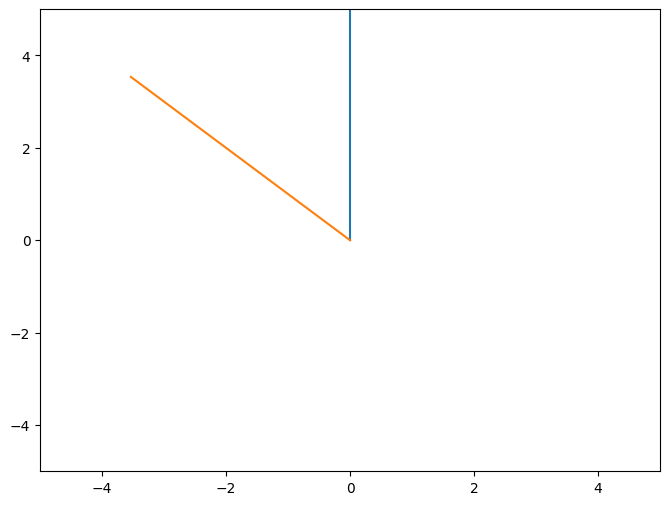

In [214]:
plt.figure(figsize=(8,6))

plt.xlim([-5,5])
plt.ylim([-5,5])

plt.plot(x, y)
plt.plot(x1,y1)

In [217]:
dims.query('team == "red_sox" and (segment == "foul_lines")').max()


team              red_sox
x              214.746905
y                  204.53
segment        foul_lines
spray_angle       57.6048
dtype: object

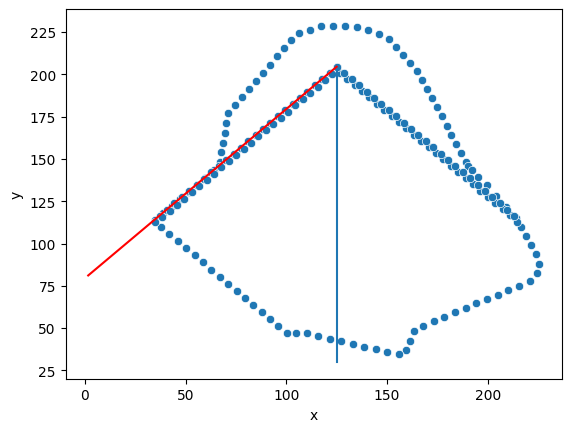

In [226]:
sns.scatterplot(data=dims.query('team == "red_sox" and (segment == "foul_lines" or segment == "outfield_outer")'), x='x',y='y')
x = np.array([125] * 1000)
y = np.linspace(30,204.53, 1000)

d = -45 * (np.pi/180)

x1 = (x - 125)*np.cos(d) - (y - 204.53)*np.sin(d) + 125
y1 = (x - 125)*np.sin(d) + (y - 204.53)*np.cos(d) + 204.53

plt.plot(x,y)
plt.plot(x1,y1,'r')

In [133]:
outfield_dims['spray_angle'] = np.tan((outfield_dims['x']-128)/(208-outfield_dims['y']))*180/np.pi*0.75

In [134]:
df = outfield_dims.query('stadium == "Fenway Park"')

(-100.0, 100.0)

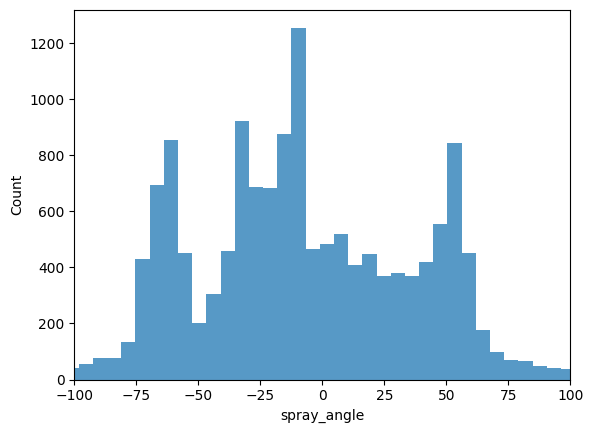

In [148]:
sns.histplot(dims['spray_angle'])
plt.xlim([-100,100])

In [136]:
df['spray_angle'].describe()

count      46.000000
mean     -139.920081
std       994.876030
min     -6714.549185
25%       -28.930923
50%         8.569199
75%        32.890322
max       247.378590
Name: spray_angle, dtype: float64

In [ ]:
df['spray_angle'] = np.tan((df['hc_x']-128)/(208-df['hc_y']))*180/np.pi*0.75

In [118]:
dist = np.polyfit(df['spray_angle_stadia'], df['d_wall'], 20)
f_dist = np.poly1d(dist)

height = np.polyfit(df['spray_angle_stadia'], df['fence_height'], 20)
f_height = np.poly1d(height)

x1 = np.linspace(min(df['spray_angle_stadia']), max(df['spray_angle_stadia']), 1000)
y1 = f_dist(x1)
y2 = f_height(x1)

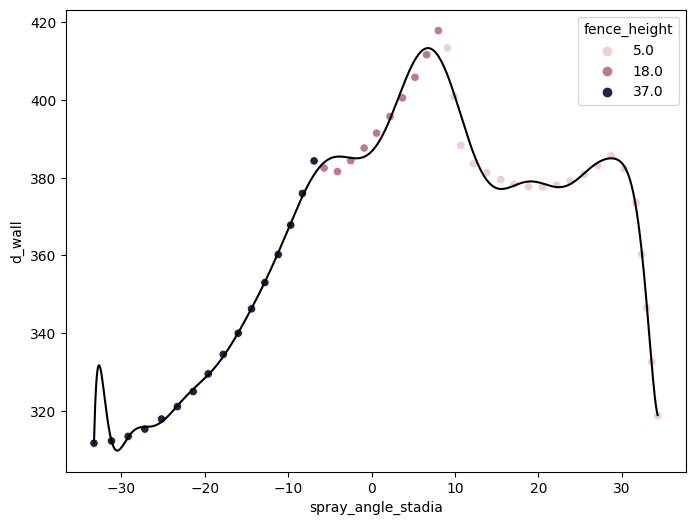

In [119]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df, x='spray_angle_stadia',y='d_wall',hue='fence_height')

plt.plot(x1, y1, c='black')

In [106]:
from scipy import optimize

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))

NameError: name 'x' is not defined

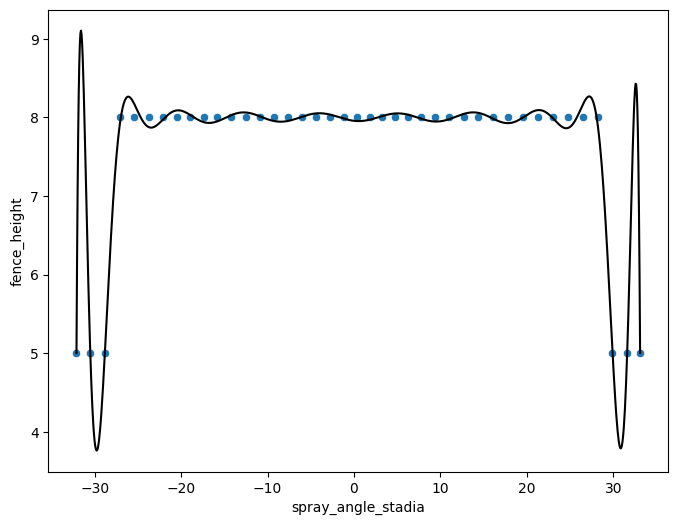

In [105]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=angels, x='spray_angle_stadia',y='fence_height')

plt.plot(x1, y2, c='black')

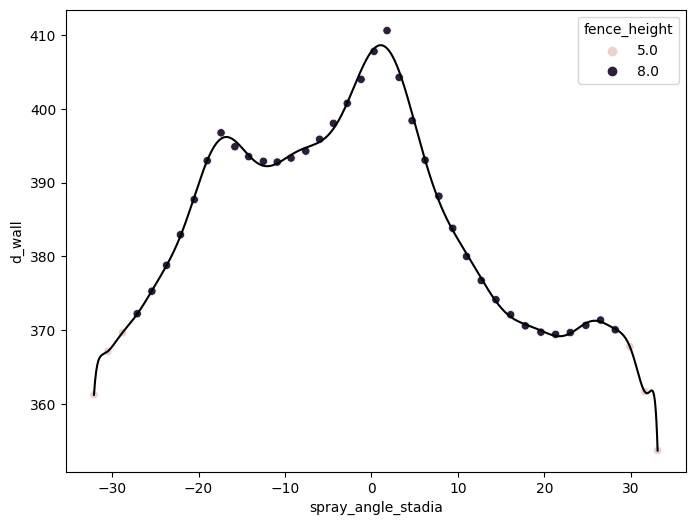

In [74]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=angels, x='spray_angle_stadia',y='d_wall',hue='fence_height')

plt.plot(x1, y1, c='black')

<AxesSubplot: xlabel='spray_angle_stadia', ylabel='d_wall'>

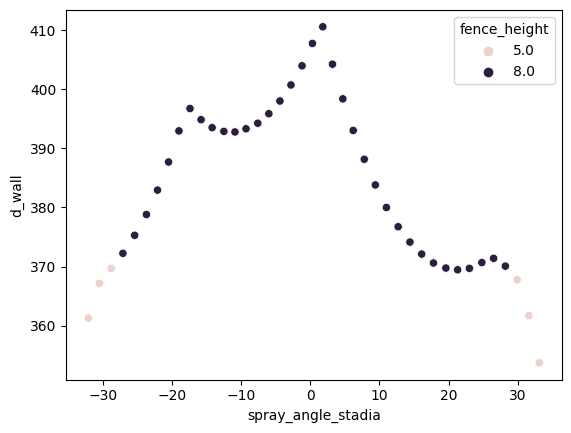

In [38]:
sns.scatterplot(data=angels,x='spray_angle_stadia',y='d_wall',hue='fence_height')

<AxesSubplot: xlabel='x', ylabel='y'>

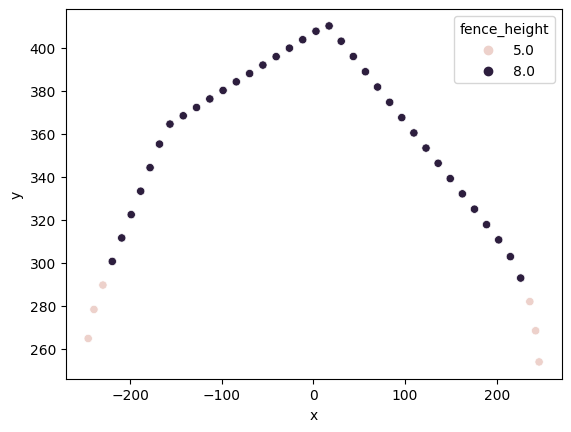

In [31]:
sns.scatterplot(data=angels,x='x',y='y',hue='fence_height')

In [36]:
def parametric_curve(x1, y1, x2, y2):
    xslope = x2 - x1
    yslope = y2 - y1
    tt = np.linspace(0, 1, num=100)
    ll = [pd.DataFrame({"x": x1 + xslope * s, "y": y1 + yslope * s}) for s in tt]
    return pd.concat(ll)

def geom_curve_gen_points(x1, x2, y, curvature):
    if x2 < x1:
        tmp = x1
        x1 = x2
        x2 = tmp
    
    k = curvature
    xscale = 0.5 * (x2 - x1)

    d1 = (1 - k**2) / (2 * k)
    r = d1 + k

    starting_theta = abs(np.arctan2(1, d1))
    tt = np.linspace(-starting_theta, starting_theta, num=100)
    x0 = 0.5 * (x1 + x2)
    y0 = y + d1 * xscale
    r = r * xscale
    xx = x0 + r * np.sin(tt)
    yy = y0 - r * np.cos(tt)
    return pd.DataFrame({"t": tt, "x": xx, "y": yy})



def generate_sample_data():
    np.random.seed(101)
    batted_ball_data = pd.DataFrame(
        {"hc_x": np.random.normal(125, 10, 20), "hc_y": np.random.normal(100, 20, 20)}
    )
    batted_ball_data["team"] = np.repeat(["angels", "yankees"], 10)
    return batted_ball_data


def generic_ballpark():
    left_outfield_line = parametric_curve(125, 208, 30, 100)
    outfield_curve = geom_curve_gen_points(30, 220, 100, 0.9)[:, ["x", "y"]]
    right_outfield_line = parametric_curve(220, 100, 125, 208)

    left_infield_line = parametric_curve(125, 208, 80, 155)
    infield_curve = geom_curve_gen_points(80, 170, 155, 0.9)[:, ["x", "y"]]
    right_infield_line = parametric_curve(170, 155, 125, 208)

    outfield_path = pd.concat(
        [left_outfield_line, outfield_curve, right_outfield_line], axis=0
    )
    outfield_path["segment"] = "outfield_outer"
    infield_path = pd.concat(
        [left_infield_line, infield_curve, right_infield_line], axis=0
    )
    infield_path["segment"] = "infield_outer"

    path_df = pd.concat([outfield_path, infield_path], axis=0)
    team_df = pd.DataFrame({"team": ["generic"] * len(path_df)})
    return pd.concat([team_df, path_df], axis=1)

